In [1]:
from igraph import *
from pulp import LpMaximize, LpMinimize, LpProblem, LpStatus, lpSum, LpVariable
import numpy as np
import re
import timeit

import igraph
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import random

In [8]:
raw_data = pd.read_csv('data/Contact-diaries-network_data_2013.csv',names=['userID', 'friendID','weight'])

In [9]:
#raw_data = pd.read_csv('data/facebook_combined.txt',names=['userID', 'friendID'],sep=' ')

In [10]:
raw_data

,userID,friendID,weight
0,3,28,2
1,3,106,1
2,3,147,4
3,3,177,1
4,3,295,4
...,...,...,...
497,1828,1237,1
498,1828,1295,1
499,1828,1412,1
500,1828,1423,2


In [11]:
randomlist = []
for i in range(0,len(raw_data)):
    n = random.randint(1,4)
    randomlist.append(n)

In [12]:
raw_data

,userID,friendID,weight
0,3,28,2
1,3,106,1
2,3,147,4
3,3,177,1
4,3,295,4
...,...,...,...
497,1828,1237,1
498,1828,1295,1
499,1828,1412,1
500,1828,1423,2


In [37]:
G = nx.Graph()
data = [(userID, friendID, weight) for userID, friendID, weight in zip(raw_data['userID'], raw_data['friendID'], raw_data['weight'])]
G.add_weighted_edges_from(data)

# Enumerate new node IDs
new_node_ids = {node: i for i, node in enumerate(G.nodes(), start=1)}

# Relabel nodes with enumerated IDs
G = nx.relabel_nodes(G, new_node_ids)

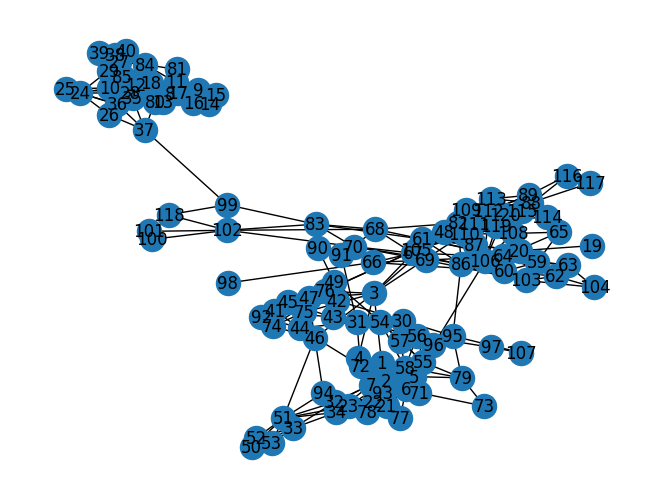

In [38]:
# pos = nx.spring_layout(G)  # Layout algorithm for node positioning
nx.draw(G, with_labels=True)  # Draw nodes and edges

In [39]:
N = G.number_of_nodes()

In [40]:
N

120

In [169]:
start = timeit.default_timer()
communities = nx.community.greedy_modularity_communities(G, weight='weight',resolution=1,best_n=3)
#communities = nx.community.louvain_communities(G,weight='weight', resolution=1)
#communities = nx.community.asyn_fluidc(G, round(N/30), max_iter=100, seed=None)
#communities = nx.community.girvan_newman(G)
#communities = nx.community.kernighan_lin_bisection(G)
#communities  = nx.community.label_propagation_communities(G)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  0.021733700000368117


In [170]:
print(len(communities))

3


In [171]:
communities

[frozenset({1,
            2,
            3,
            4,
            5,
            6,
            7,
            21,
            22,
            23,
            30,
            31,
            32,
            33,
            34,
            41,
            42,
            43,
            44,
            45,
            46,
            47,
            49,
            50,
            51,
            52,
            53,
            54,
            55,
            56,
            57,
            58,
            71,
            72,
            73,
            74,
            75,
            76,
            77,
            78,
            79,
            90,
            91,
            92,
            93,
            94,
            95,
            96,
            97,
            107}),
 frozenset({19,
            20,
            48,
            59,
            60,
            61,
            62,
            63,
            64,
            65,
            66,
            67,
            

In [172]:
for i in range(len(communities)):
    print(len(communities[i]))

50
43
27


In [173]:
node_colors = {}
colors = ['red', 'blue', 'green', 'yellow', 'orange','pink','purple','gold']

for i, community in enumerate(communities, start=1):
    for v in community:
        node_colors[v] = colors[i%8]
    print(f"Community {i} length: {len(community)}")
    print(f"Community {i}: {community}")

Community 1 length: 50
Community 1: frozenset({1, 2, 3, 4, 5, 6, 7, 21, 22, 23, 30, 31, 32, 33, 34, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 71, 72, 73, 74, 75, 76, 77, 78, 79, 90, 91, 92, 93, 94, 95, 96, 97, 107})
Community 2 length: 43
Community 2: frozenset({19, 20, 48, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 82, 83, 86, 87, 88, 89, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120})
Community 3 length: 27
Community 3: frozenset({8, 9, 10, 11, 12, 13, 14, 15, 16, 80, 18, 17, 81, 84, 85, 24, 25, 26, 27, 28, 29, 35, 36, 37, 38, 39, 40})


In [176]:
count=0
for item in communities:
    print(len(item))
    count+=len(item)
print(count)

50
43
27
120


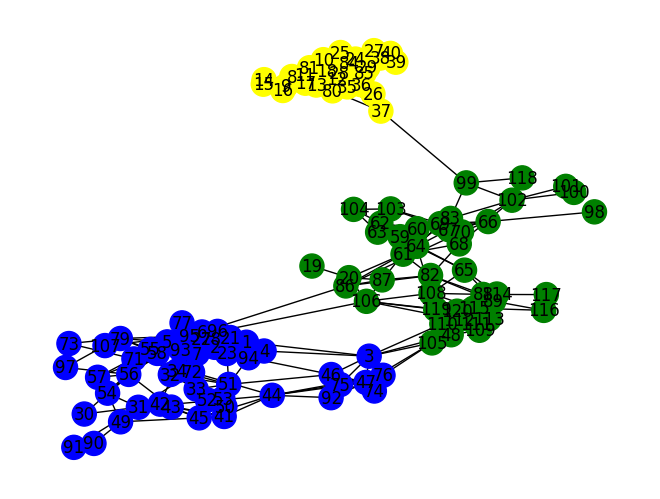

In [177]:
nx.draw(G, with_labels=True, node_color=[node_colors.get(node, 'blue') for node in G.nodes()])  # Draw nodes and edges

In [178]:
cost_open = np.ones(N)*10
cost_connect = [[999] * N for _ in range(N)]
for u, v, w in G.edges(data='weight'):
    cost_connect[u-1][v-1] = w
for i in range(N):
    for j in range(i, N):
        cost_connect[j][i] = cost_connect[i][j]
    cost_connect[i][i] = 999


50


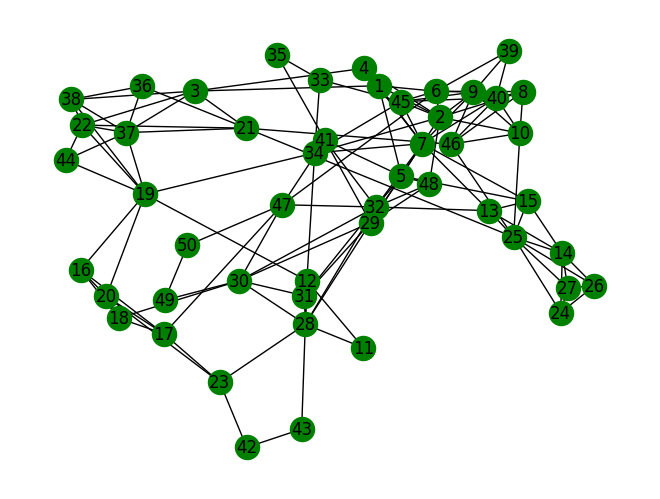

In [179]:
G1 = nx.subgraph(G, communities[0])
new_node_ids = {node: i for i, node in enumerate(G1.nodes(), start=1)}# Enumerate new node IDs
G1 = nx.relabel_nodes(G1, new_node_ids)# Relabel nodes with enumerated IDs
print(G1.number_of_nodes())
nx.draw(G1, with_labels=True, node_color=['green'])  # Draw nodes and edges

43


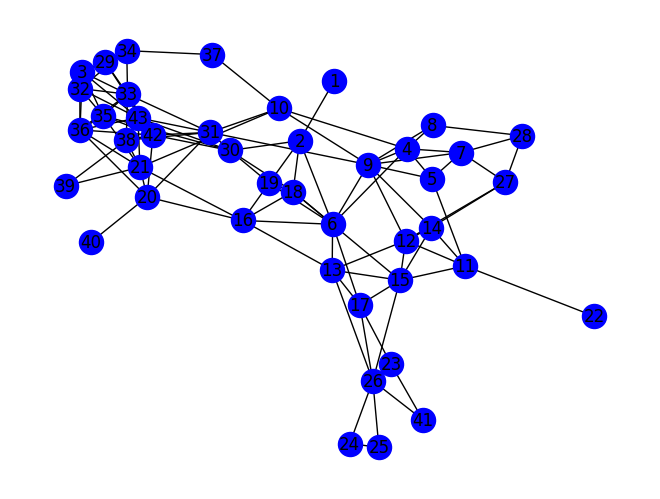

In [180]:
G2 = nx.subgraph(G, communities[1])
new_node_ids = {node: i for i, node in enumerate(G2.nodes(), start=1)}# Enumerate new node IDs
G2 = nx.relabel_nodes(G2, new_node_ids)# Relabel nodes with enumerated IDs
print(G2.number_of_nodes())
nx.draw(G2, with_labels=True, node_color=['blue'])  # Draw nodes and edges

27


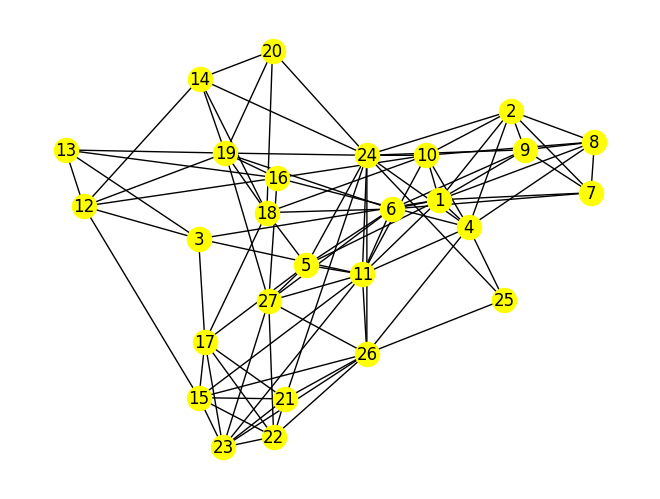

In [181]:
G3 = nx.subgraph(G, communities[2])
new_node_ids = {node: i for i, node in enumerate(G3.nodes(), start=1)}# Enumerate new node IDs
G3 = nx.relabel_nodes(G3, new_node_ids)# Relabel nodes with enumerated IDs
print(G3.number_of_nodes())
nx.draw(G3, with_labels=True, node_color=['yellow'])  # Draw nodes and edges

In [182]:
def getSubGraph(G, community):
    Gn = nx.subgraph(G, community)
    new_node_ids = {node: i for i, node in enumerate(Gn.nodes(), start=1)}# Enumerate new node IDs
    Gn = nx.relabel_nodes(Gn, new_node_ids)# Relabel nodes with enumerated IDs
    return Gn

In [183]:
def solve_model(Graph):
    N = Graph.number_of_nodes()
    cost_open = np.ones(N)*10
    cost_connect = [[999] * N for _ in range(N)]
    for u, v, w in Graph.edges(data='weight'):
        cost_connect[u-1][v-1] = w
    for i in range(N):
        for j in range(i, N):
            cost_connect[j][i] = cost_connect[i][j]

    # Define the model
    model = LpProblem(name="node-location", sense=LpMinimize)
    # Define the decision variables
    u = {(i,j): LpVariable(name=f"u{(i,j)}", cat='Binary') for i in range(N) for j in range(N)}
    # define decay index
    epsilon = 2
    # Define the node type variables
    S = {i: LpVariable(name=f"S{i}", cat='Binary')for i in range(N)}
    a = {i: LpVariable(name=f"a{i}", cat='Binary')for i in range(N)}
    b = {i: LpVariable(name=f"b{i}", cat='Binary')for i in range(N)}
    c = {i: LpVariable(name=f"c{i}", cat='Binary')for i in range(N)}
    #Define the connect access variables
    Sa = {(i,j): LpVariable(name=f"Sa{i,j}", cat='Binary')for i in range(N) for j in range(N)}
    ab = {(i,j): LpVariable(name=f"ab{i,j}", cat='Binary')for i in range(N) for j in range(N)}
    bc = {(i,j): LpVariable(name=f"bc{i,j}", cat='Binary')for i in range(N) for j in range(N)}

    #add objective function first
    model += (
        lpSum(Sa[i,j]*cost_connect[i][j] +
              epsilon*ab[i,j]*cost_connect[i][j] +
              epsilon*epsilon*bc[i,j]*cost_connect[i][j] for i in range(N) for j in range(N))
        +lpSum(cost_open[i]*S[i] for i in range(N)),
        'Sum of open and connect cost',
    )

    #Add constraints
    for j in range(N):
        model += (
            lpSum(u[i,j] for i in range(N)) == 1-S[j],
            f"connected constraints_{j}",
        )

    for i in range(N):
        for j in range(N):
                model += (
                    u[i,j] <= Sa[i,j]+ab[i,j]+bc[i,j],
                    f'no connection across different casade or node constraint_{i,j}',
                )
    for i in range(N):
        for j in range(N):
                model += (
                    Sa[i,j] <= S[i],
                    f'S a first connection constraint_{i,j}',
                )

    for i in range(N):
        for j in range(N):
                model += (
                    Sa[i,j] <= a[j],
                    f'S a second connection constraint_{i,j}',
                )

    for i in range(N):
        for j in range(N):
                model += (
                    ab[i,j] <= a[i],
                    f'a b first connection constraint_{i,j}',
                )
    for i in range(N):
        for j in range(N):
                model += (
                    ab[i,j] <= b[j],
                    f'a b second connection constraint_{i,j}',
                )

    for i in range(N):
        for j in range(N):
                model += (
                    bc[i,j] <= b[i],
                    f'b c first connection constraint_{i,j}',
                )
    for i in range(N):
        for j in range(N):
                model += (
                    bc[i,j] <= c[j],
                    f'b c second connection constraint_{i,j}',
                )


    for i in range(N):
         model += (
            u[i,i] == 0,
            f"node can not connect to it self constraints_{i}",
        )
    for i in range(N):
         model += (
            lpSum(u[i,j] for j in range(N)) <=(S[i]+a[i]+b[i])*N,
            f"node S capacity constraints_{i}",
        )
    # for i in range(N):
    #      model += (
    #         lpSum(u[i,j] for j in range(N)) <=(a[i])*N,
    #         f"node a capacity constraints_{i}",
    #     )
    for i in range(N):
         model += (
            S[i]+a[i]+b[i]+c[i] == 1,
            f"node type constraints_{i}",
        )

    start = timeit.default_timer()
    status = model.solve()
    stop = timeit.default_timer()
    print('Time: ', stop - start)
    return model.objective.value()

In total: 3
0
50
Time:  3.7603885999997146
1
43
Time:  2.793070299999272
2
27
Time:  1.337155299999722


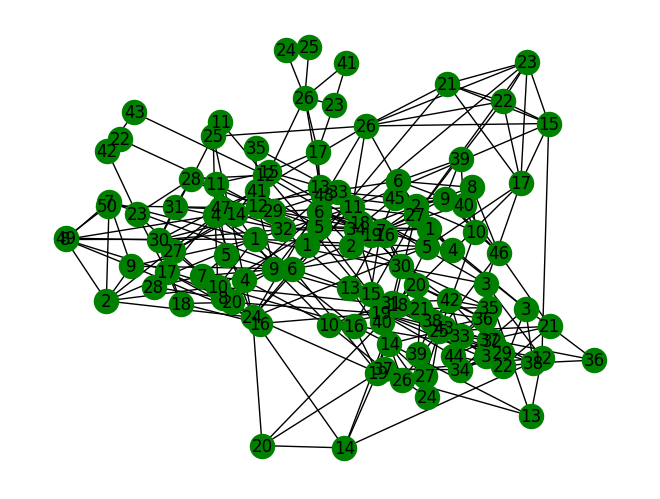

In [184]:
res=[]
communities = list(communities)
print('In total:',len(communities))
for i in range(len(communities)):
    print(i)
    Gn = nx.subgraph(G, communities[i])
    new_node_ids = {node: i for i, node in enumerate(Gn.nodes(), start=1)}# Enumerate new node IDs
    Gn = nx.relabel_nodes(Gn, new_node_ids)# Relabel nodes with enumerated IDs
    print(Gn.number_of_nodes())
    nx.draw(Gn, with_labels=True, node_color=['green'])  # Draw nodes and edges
    res.append(solve_model(Gn)) 

In [185]:
res1 = solve_model(G1)
res2 = solve_model(G2)
res3 = solve_model(G3)
result = res1 + res2 + res3
print(res1, res2, res3)
print("scaled MIP  : ", result)
print("optimal  MIP: ", 395)
print("heuristic: ", 468)

Time:  3.633011400000214
Time:  2.9816360999993776
Time:  1.424810699999398
171.0 143.0 90.0
scaled   :  404.0
optimal  :  395
heuristic:  468
